# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [14]:
# A + B

In [15]:
# A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [24]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

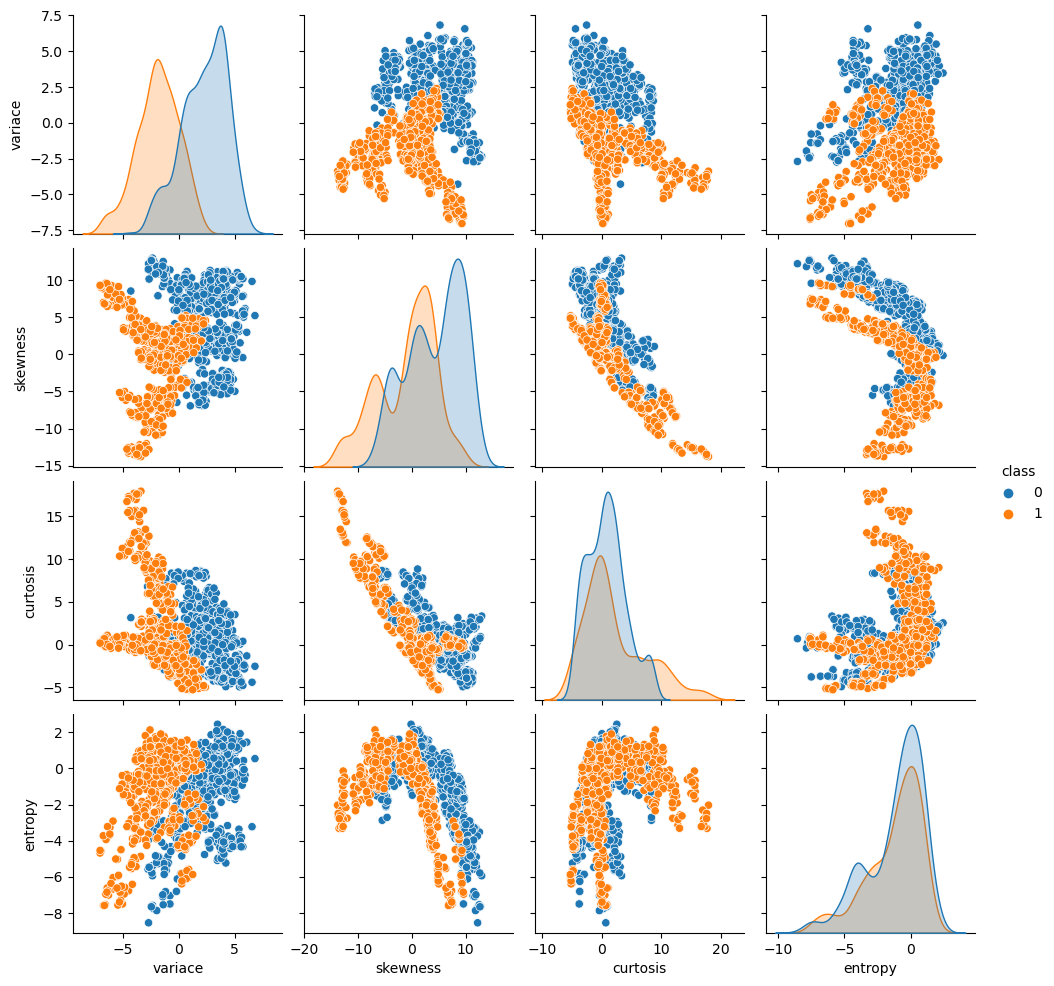

In [29]:
sns.pairplot(df, hue="class");

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99636364, 0.98905109, 0.99635036, 0.99635036])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

2023-02-01 11:03:02.200954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10


2023-02-01 11:03:04.084046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


30/30 [==============================] - 0s 617us/step - loss: 0.5240 - accuracy: 0.7396
Epoch 2/10
30/30 [==============================] - 0s 626us/step - loss: 0.5105 - accuracy: 0.7417
Epoch 3/10
30/30 [==============================] - 0s 635us/step - loss: 0.4979 - accuracy: 0.7531
Epoch 4/10
30/30 [==============================] - 0s 571us/step - loss: 0.4861 - accuracy: 0.7625
Epoch 5/10
30/30 [==============================] - 0s 685us/step - loss: 0.4750 - accuracy: 0.7719
Epoch 6/10
30/30 [==============================] - 0s 720us/step - loss: 0.4646 - accuracy: 0.7771
Epoch 7/10
30/30 [==============================] - 0s 571us/step - loss: 0.4548 - accuracy: 0.7812
Epoch 8/10
30/30 [==============================] - 0s 556us/step - loss: 0.4454 - accuracy: 0.7896
Epoch 9/10
30/30 [==============================] - 0s 570us/step - loss: 0.4366 - accuracy: 0.7979
Epoch 10/10
30/30 [==============================] - 0s 559us/step - loss: 0.4281 - accuracy: 0.8052


In [36]:
historydf = pd.DataFrame(history.history, index=history.epoch)

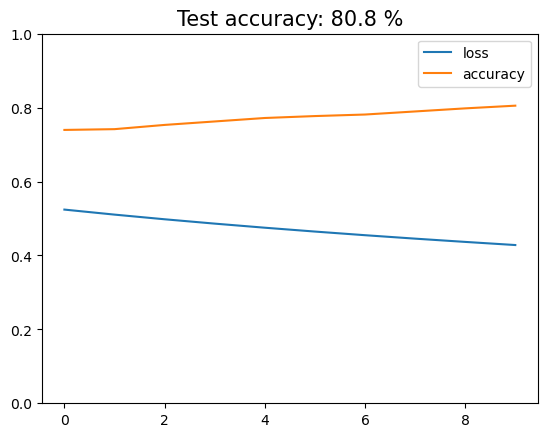

In [37]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [38]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [39]:
historydf = pd.concat(dflist, axis=1)

In [40]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,0.385749,0.889583,0.775748,0.509375,0.385349,0.872917,0.202793,0.957292
1,0.342966,0.927083,0.425657,0.885417,0.251391,0.930208,0.112409,0.967708
2,0.313861,0.936458,0.329572,0.914583,0.206220,0.942708,0.088424,0.975000
3,0.292739,0.940625,0.280258,0.925000,0.177325,0.950000,0.076443,0.978125
4,0.276744,0.940625,0.247643,0.933333,0.156921,0.957292,0.068653,0.980208
5,0.264095,0.942708,0.223383,0.940625,0.141731,0.964583,0.063459,0.980208
6,0.253705,0.947917,0.204185,0.951042,0.129948,0.967708,0.059357,0.979167
7,0.244948,0.947917,0.188746,0.954167,0.120668,0.969792,0.056311,0.980208
8,0.237334,0.947917,0.175843,0.955208,0.112984,0.969792,0.053966,0.981250
9,0.230633,0.950000,0.165013,0.960417,0.106589,0.971875,0.051593,0.981250


In [41]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [42]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.385749  0.889583  0.775748  0.509375  0.385349  0.872917   
1              0.342966  0.927083  0.425657  0.885417  0.251391  0.930208   
2              0.313861  0.936458  0.329572  0.914583  0.206220  0.942708   
3              0.292739  0.940625  0.280258  0.925000  0.177325  0.950000   
4              0.276744  0.940625  0.247643  0.933333  0.156921  0.957292   
5              0.264095  0.942708  0.223383  0.940625  0.141731  0.964583   
6              0.253705  0.947917  0.204185  0.951042  0.129948  0.967708   
7              0.244948  0.947917  0.188746  0.954167  0.120668  0.969792   
8              0.237334  0.947917  0.175843  0.955208  0.112984  0.969792   
9              0.230633  0.950000  0.165013  0.960417  0.106589  0.971875   

learning_rate      0.50            
metric             loss  accuracy  
0              0.202793  0.957292  
1              0.112409  0.967708  
2              0.088424  0.975000  
3              0.076443  0.978125  
4              0.068653  0.980208  
5              0.063459  0.980208  
6              0.059357  0.979167  
7              0.056311  0.980208  
8              0.053966  0.981250  
9              0.051593  0.981250

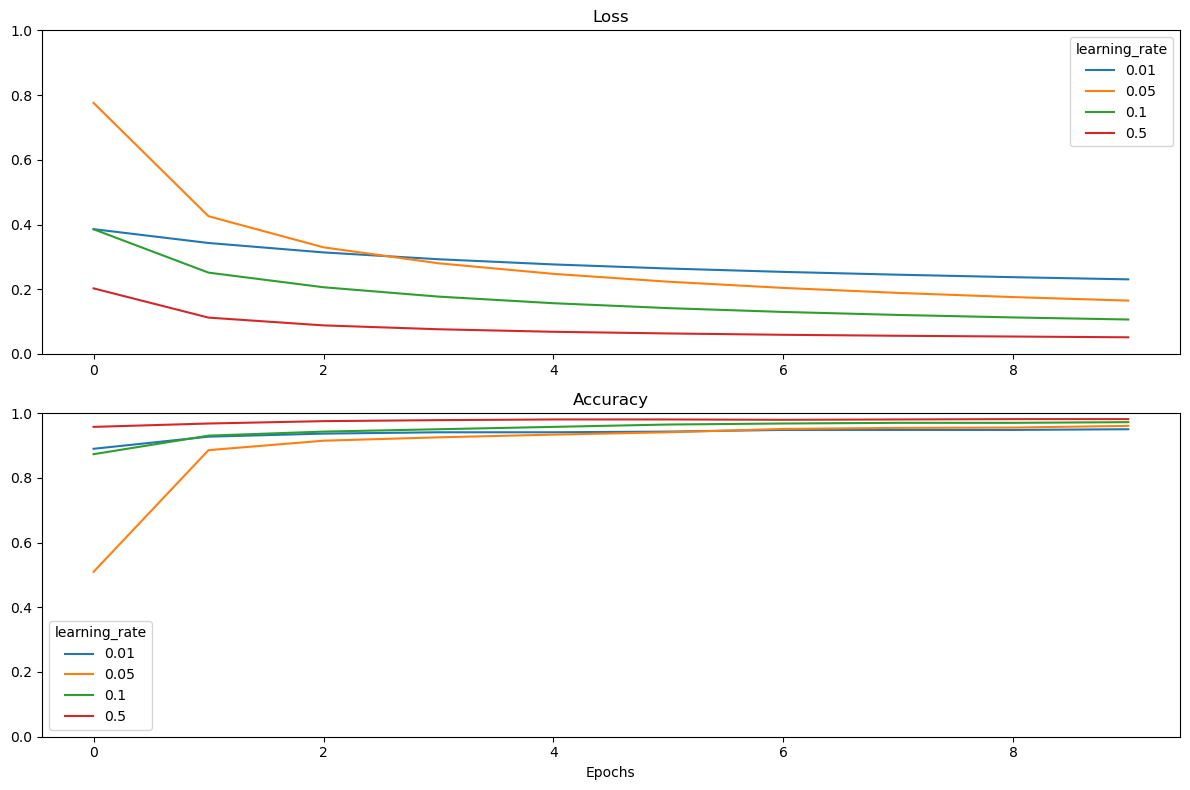

In [43]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [44]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [45]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [46]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.861147  0.448958  0.821863  0.514583  1.004569  0.514583   
1           0.777550  0.529167  0.746578  0.555208  0.931742  0.528125   
2           0.710535  0.576042  0.681173  0.609375  0.864319  0.535417   
3           0.655441  0.587500  0.624694  0.671875  0.802681  0.556250   
4           0.609462  0.609375  0.576029  0.710417  0.746873  0.572917   
5           0.570351  0.634375  0.534144  0.753125  0.696855  0.587500   
6           0.536533  0.677083  0.498121  0.779167  0.652374  0.607292   
7           0.507059  0.727083  0.467182  0.815625  0.613019  0.628125   
8           0.480976  0.759375  0.440546  0.843750  0.578459  0.666667   
9           0.457832  0.779167  0.417592  0.860417  0.548180  0.703125   

batch_size       128            
metric          loss  accuracy  
0           1.369413  0.253125  
1           1.322748  0.257292  
2           1.277684  0.258333  
3           1.233314  0.258333  
4           1.191203  0.258333  
5           1.151072  0.261458  
6           1.111461  0.265625  
7           1.073674  0.267708  
8           1.037890  0.275000  
9           1.003340  0.281250

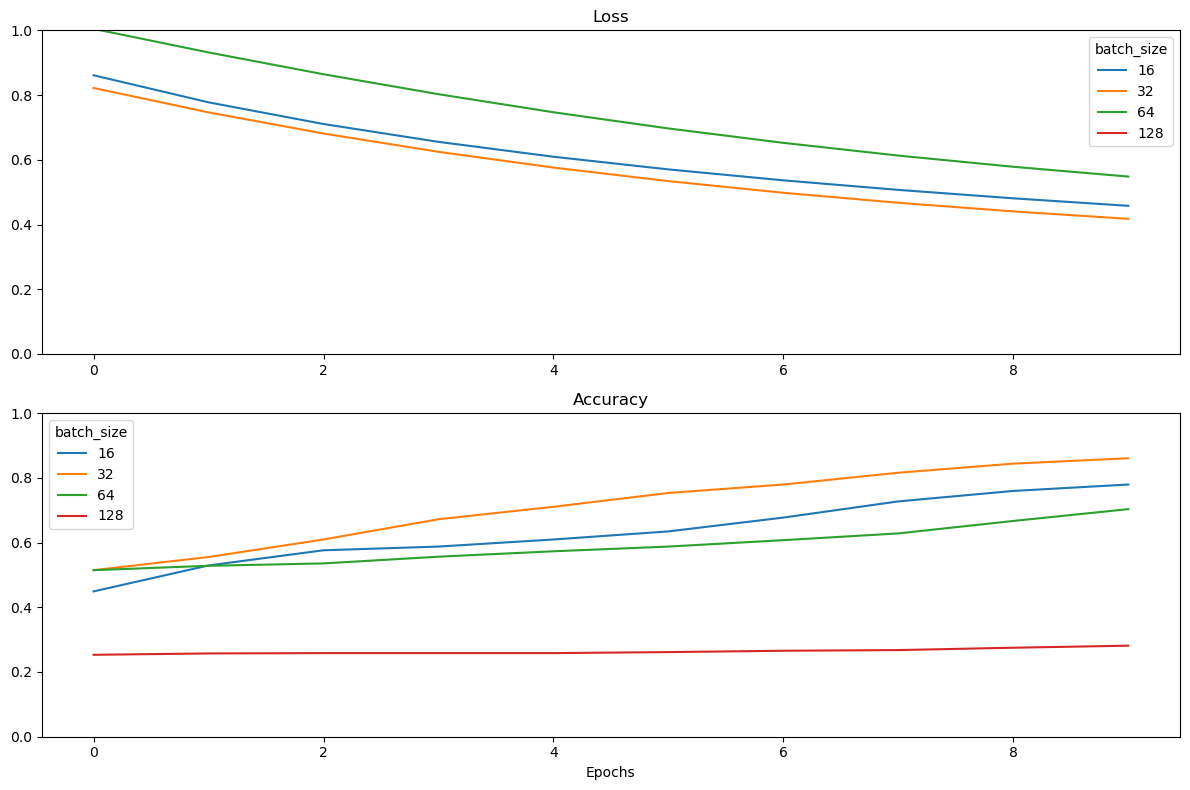

In [47]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [48]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [50]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

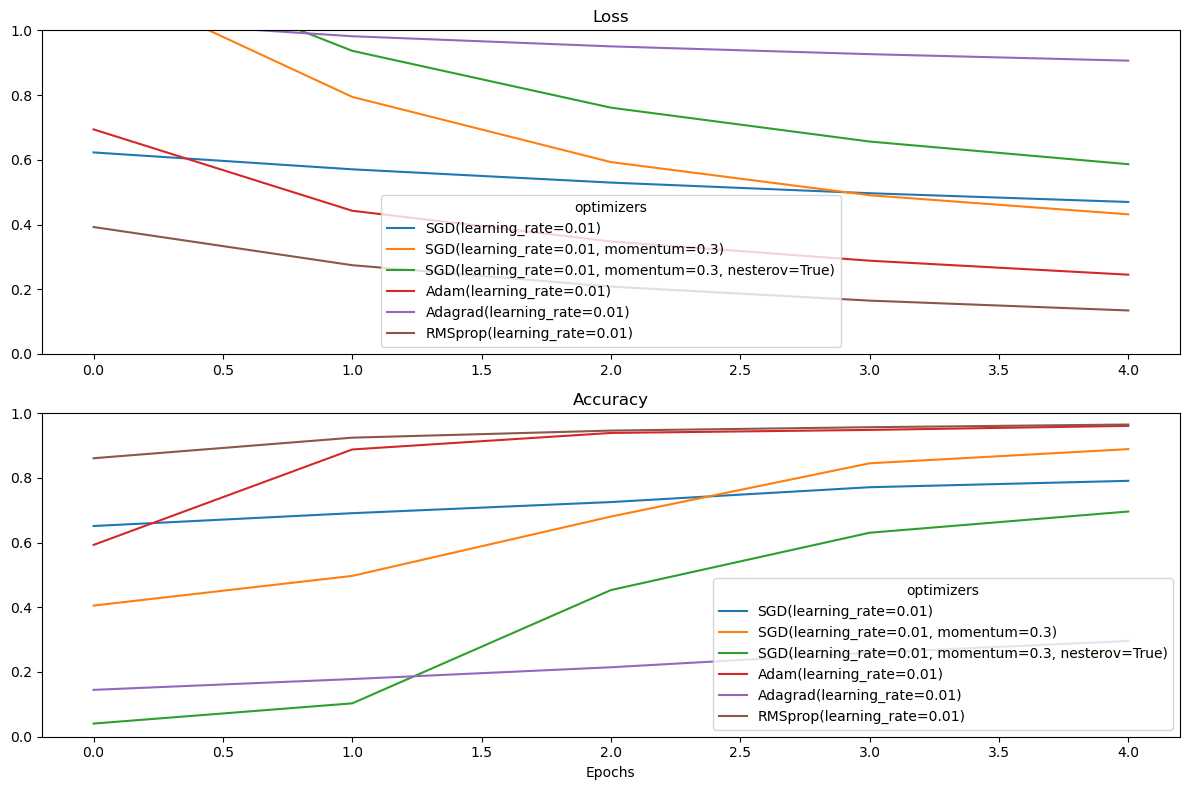

In [51]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [52]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

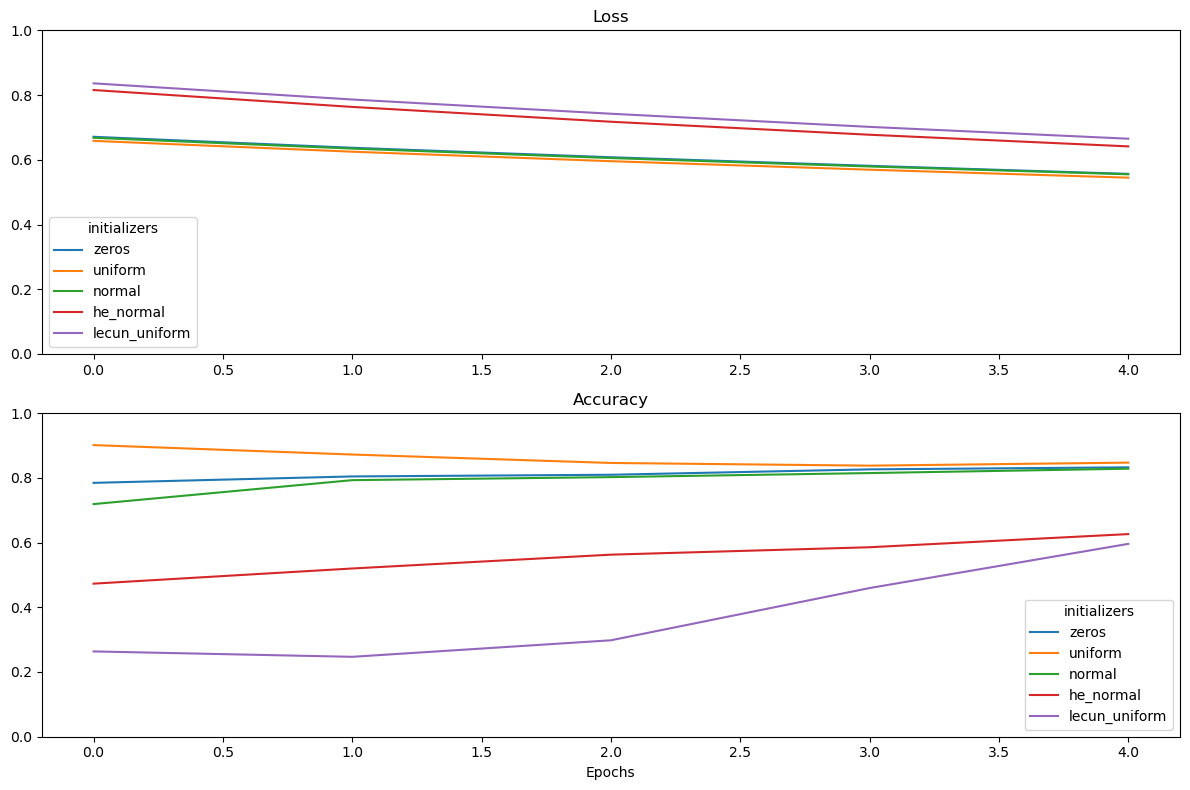

In [54]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [55]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.6786 - val_loss: 0.5592 - val_accuracy: 0.7292
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7946 - val_loss: 0.4333 - val_accuracy: 0.8194
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8571 - val_loss: 0.3136 - val_accuracy: 0.8611
Epoch 4/20
42/42 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.9003 - val_loss: 0.2170 - val_accuracy: 0.9340
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9345 - val_loss: 0.1463 - val_accuracy: 0.9583
Epoch 6/20
42/42 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9568 - val_loss: 0.0929 - val_accuracy: 0.9688
Epoch 7/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9688 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 8/20
42/42 [==

In [56]:
result

[0.027553891763091087, 0.987864077091217]

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.layers

In [59]:
inp = model.layers[0].input
out = model.layers[0].output

In [60]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [61]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [62]:
features_function = K.function([inp], [out])

In [63]:
features_function

<function keras.backend.function.<locals>.func(model_inputs)>

In [64]:
features_function([X_test])[0].shape

(412, 2)

In [65]:
features = features_function([X_test])[0]

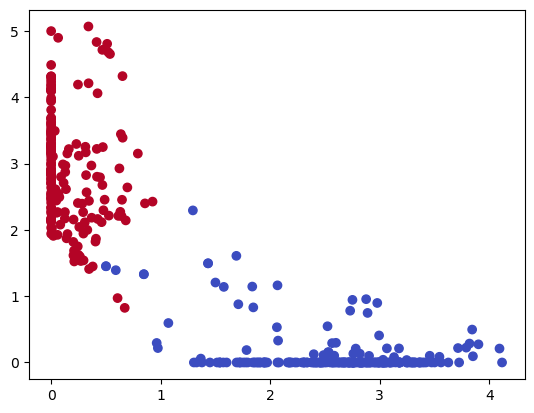

In [66]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [67]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

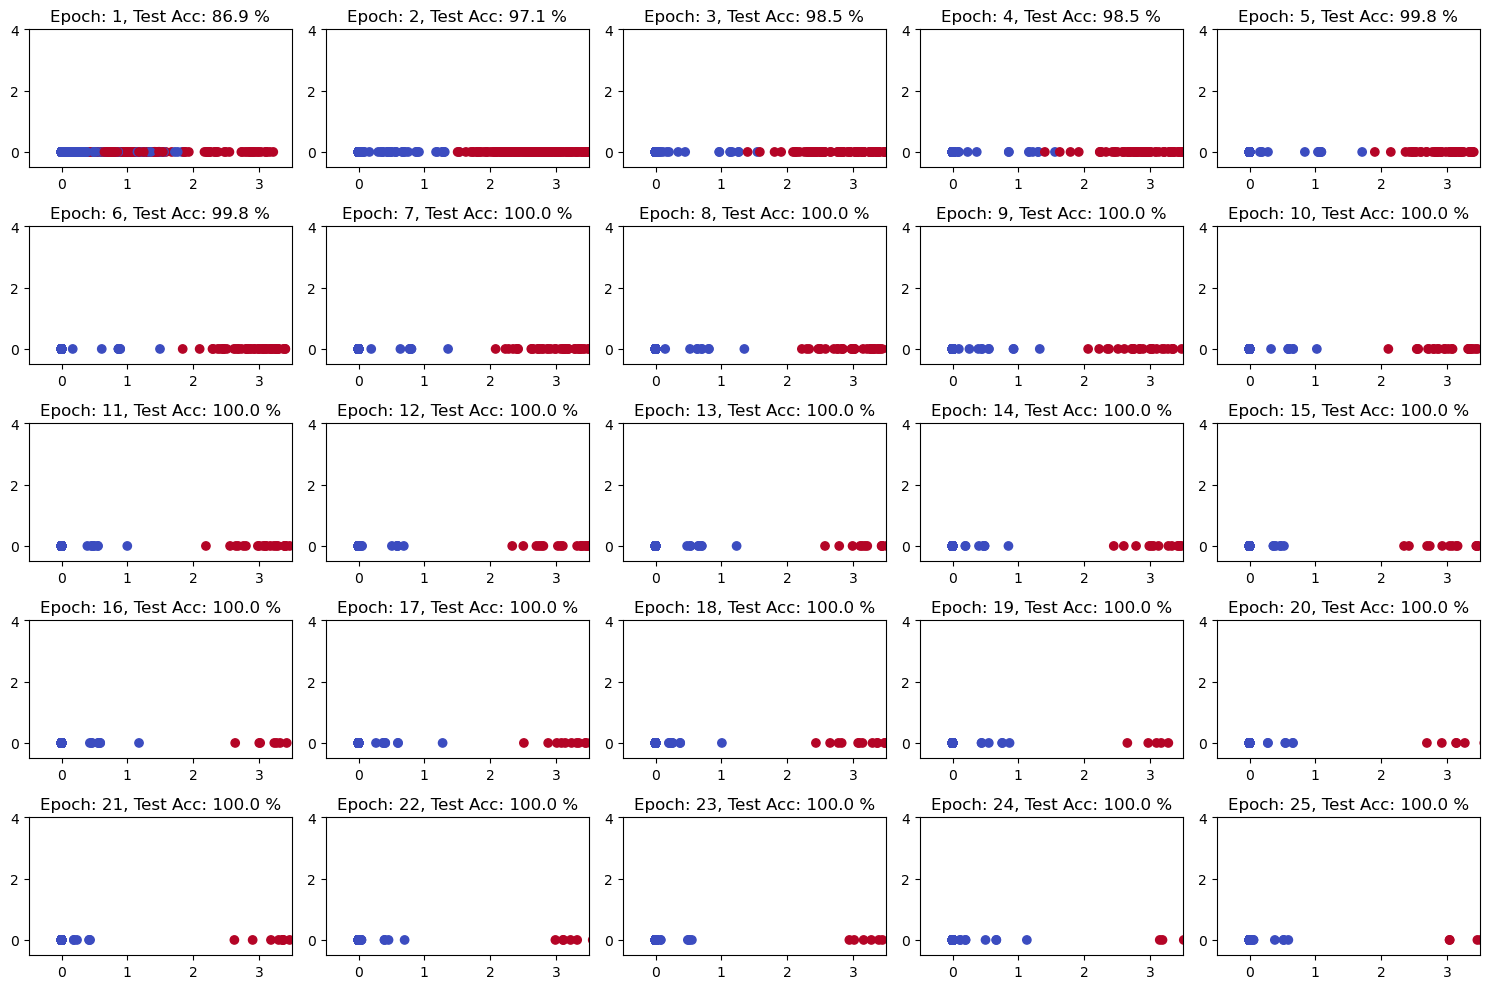

In [68]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard